#### **Importing Data**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import scikitplot

In [51]:
data = pd.read_csv("dataset/train.csv")

In [52]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [53]:
data.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [55]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* Average departure delay: 14 Minutes
* Average arrival delay: 15 Minutes
* Inflight wifi service has the lowest rating out of 5 (2.72)

In [56]:
cat_cols_temp = [
    'Inflight wifi service', 
    'Departure/Arrival time convenient', 
    'Ease of Online booking', 
    'Gate location', 
    'Food and drink', 
    'Online boarding', 
    'Seat comfort', 
    'Inflight entertainment', 
    'On-board service', 
    'Leg room service', 
    'Baggage handling', 
    'Checkin service', 
    'Inflight service', 
    'Cleanliness'
]

In [57]:
data[cat_cols_temp] = data[cat_cols_temp].astype(object)

#### **Exploratory Data Analysis**

In [58]:
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = data.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


##### Univariate Analysis

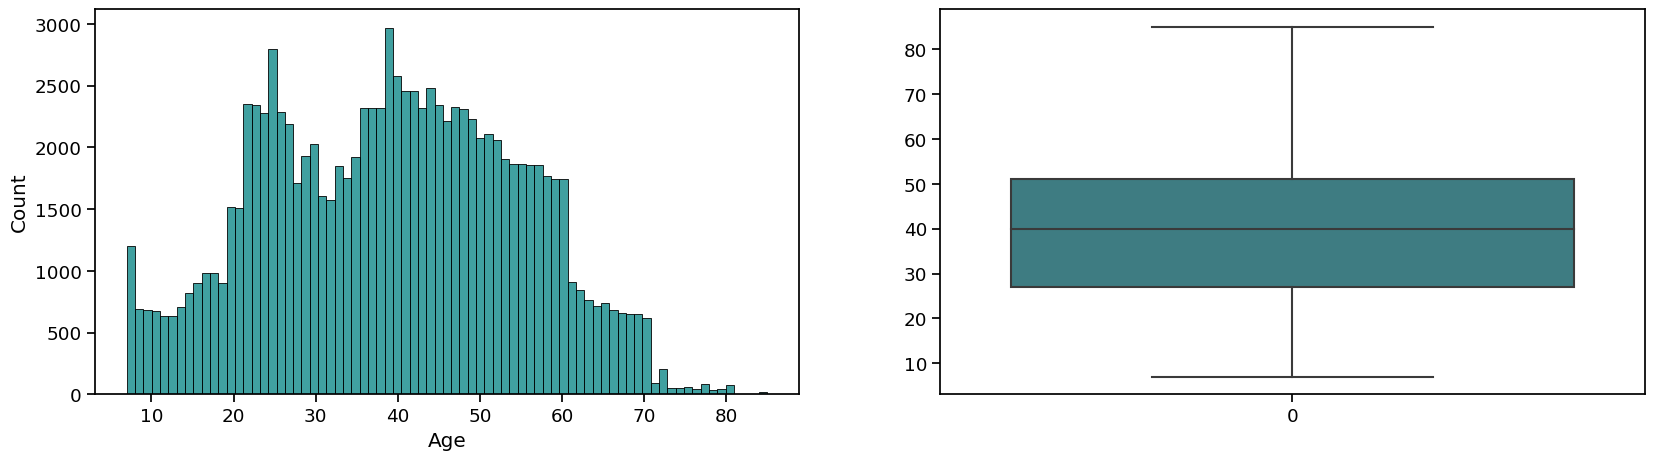

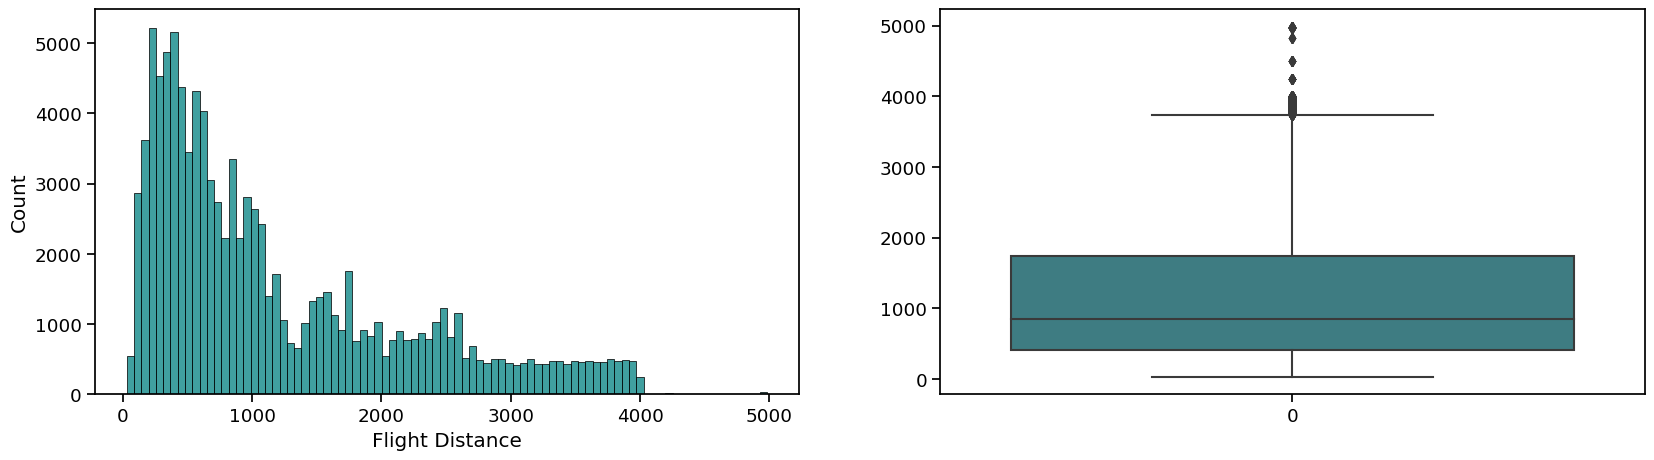

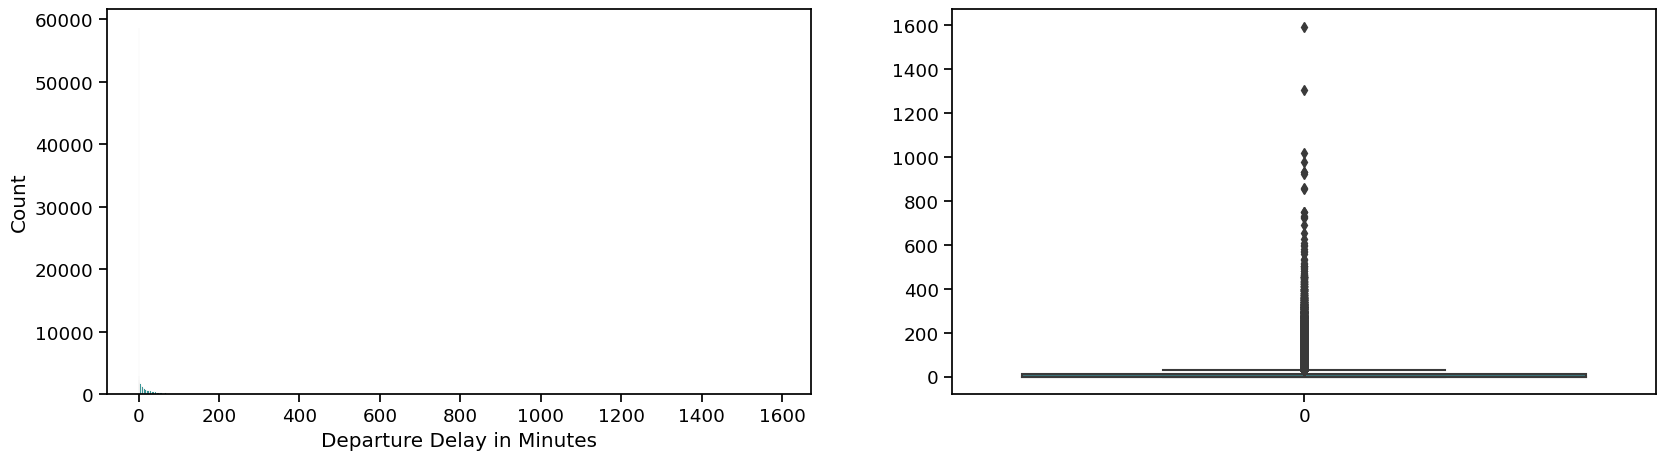

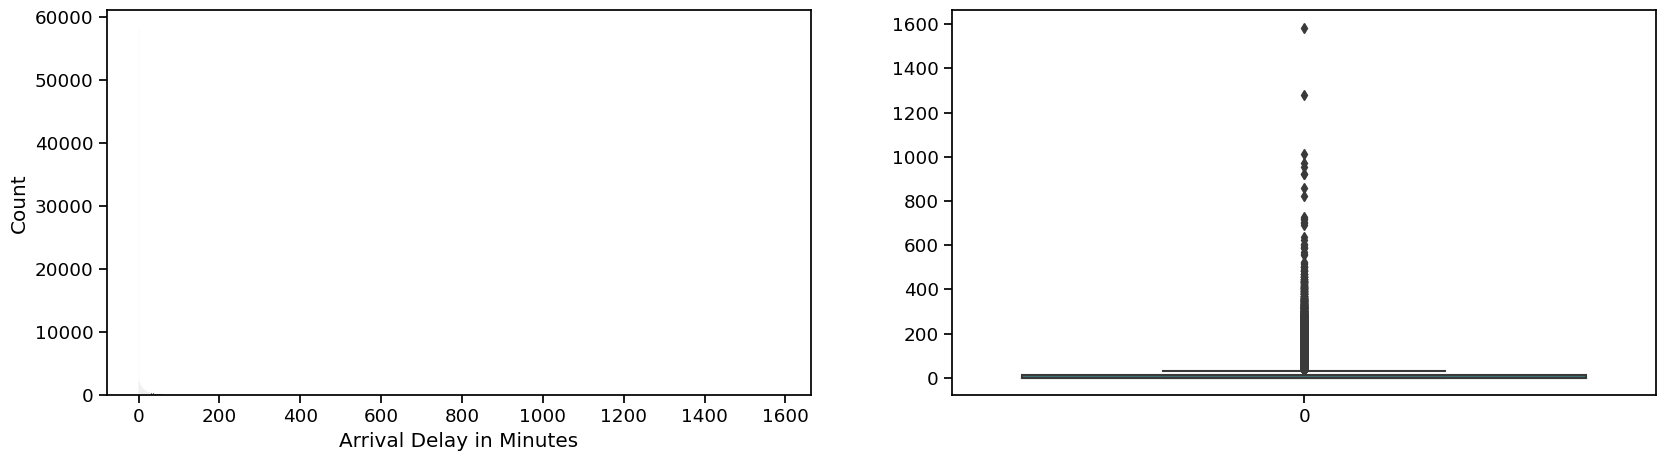

In [59]:
sns.set_context('notebook', font_scale= 1.2)
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(data=data[col], ax = ax[0], color= 'teal')
    sns.boxplot(data=data[col], ax= ax[1], palette= 'crest')

* Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.
* Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km

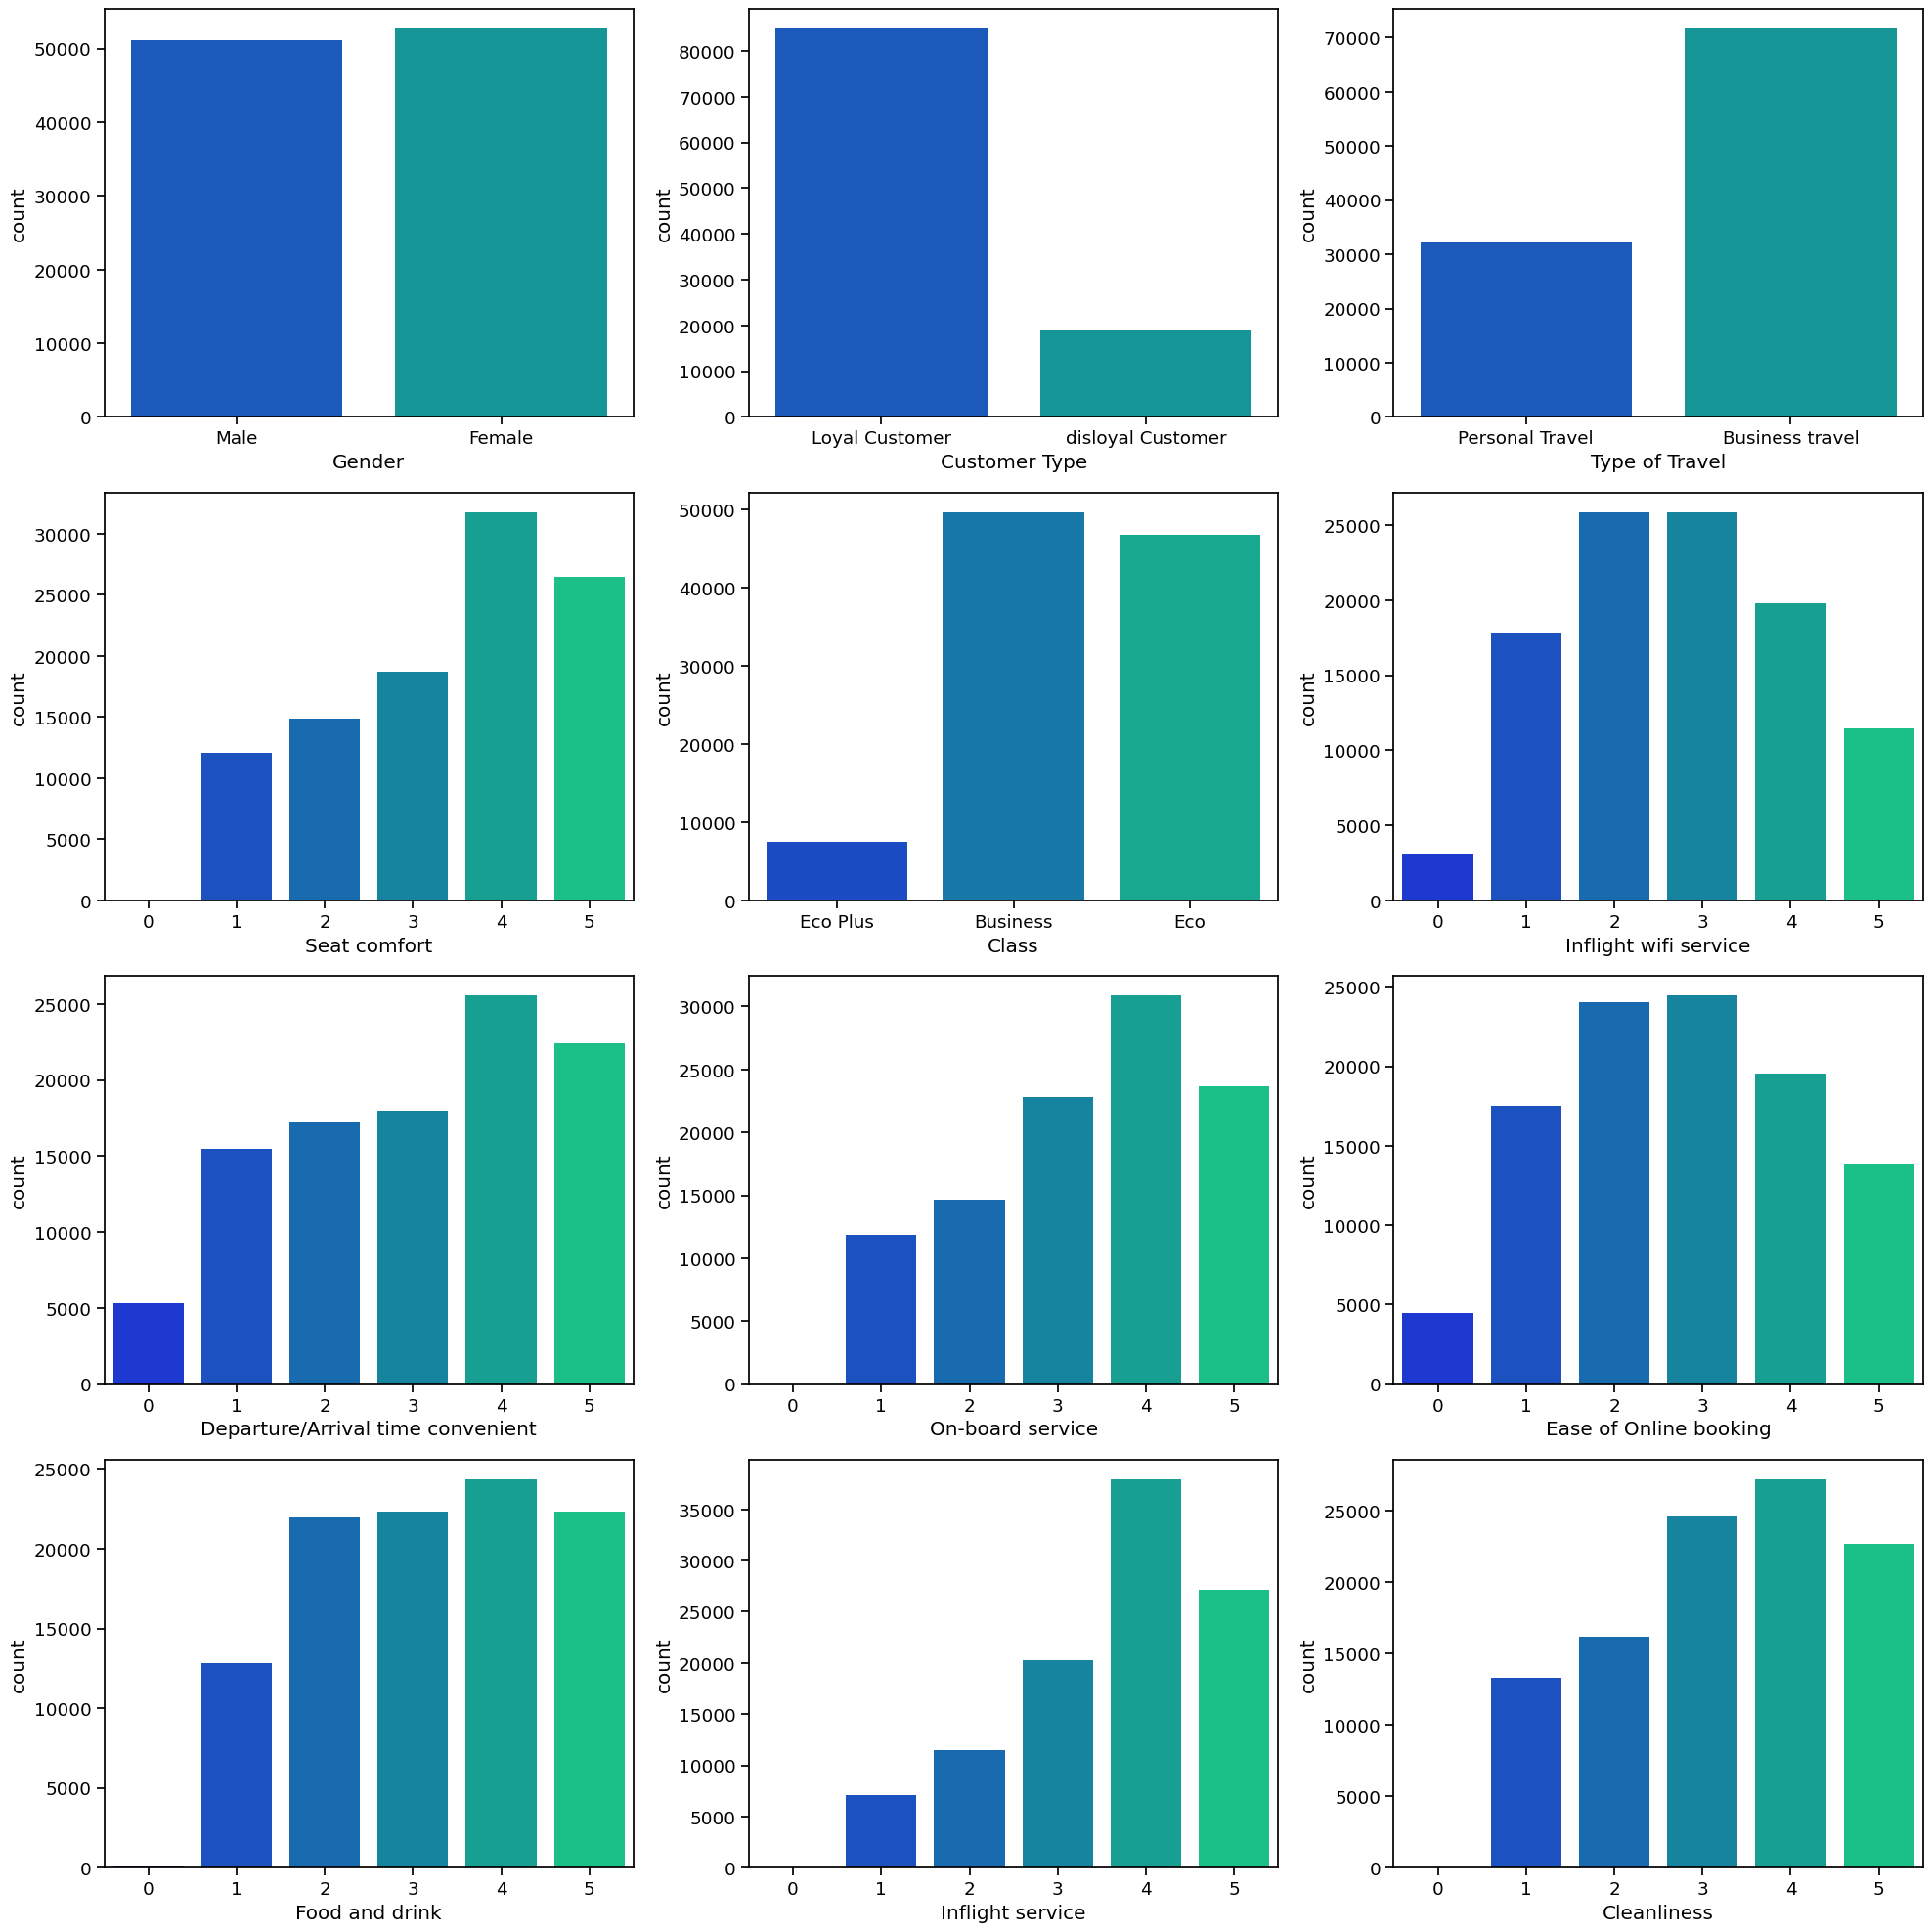

In [60]:
cols_temp = [
    'Gender', 
    'Customer Type', 
    'Type of Travel', 
    'Seat comfort', 
    'Class', 
    'Inflight wifi service', 
    'Departure/Arrival time convenient', 
    'On-board service', 
    'Ease of Online booking', 
    'Food and drink', 
    'Inflight service', 
    'Cleanliness', 
]

n_rows = 4
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols_temp):
            ax_i = ax[r, c]
            sns.countplot(x=cols_temp[i], data=data, palette='winter', ax=ax_i);

plt.tight_layout()
plt.show()

* Food and Drink facilities have almost equal number of 2, 3, 4 and 5 ratings.
* Wifi and Ease of Online Booking have recieved 2 out of 5 majority of the times

##### Bivariate Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_8488\3062567217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="Blues")


<Axes: >

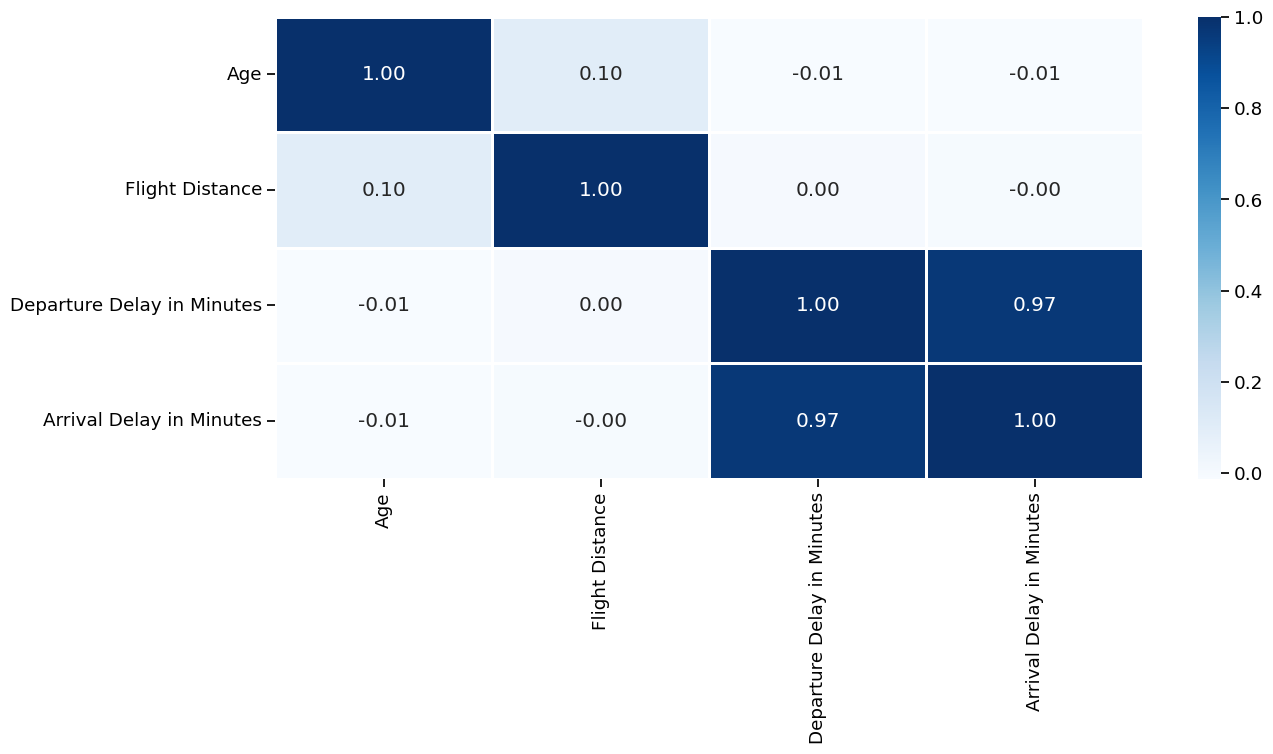

In [61]:
plt.figure(figsize= (14, 6))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="Blues")

Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped

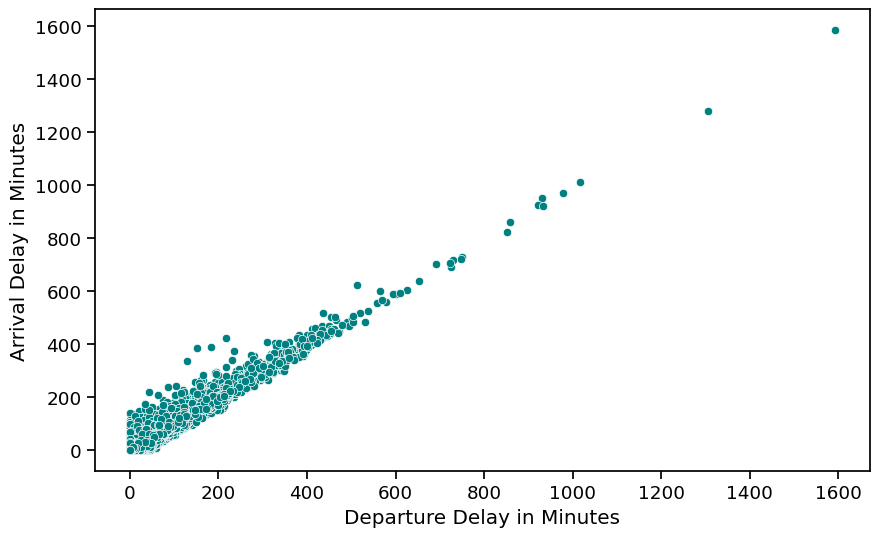

In [62]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=data, color='teal')
plt.show()

In [63]:
data.drop('Departure Delay in Minutes', axis=1, inplace= True)

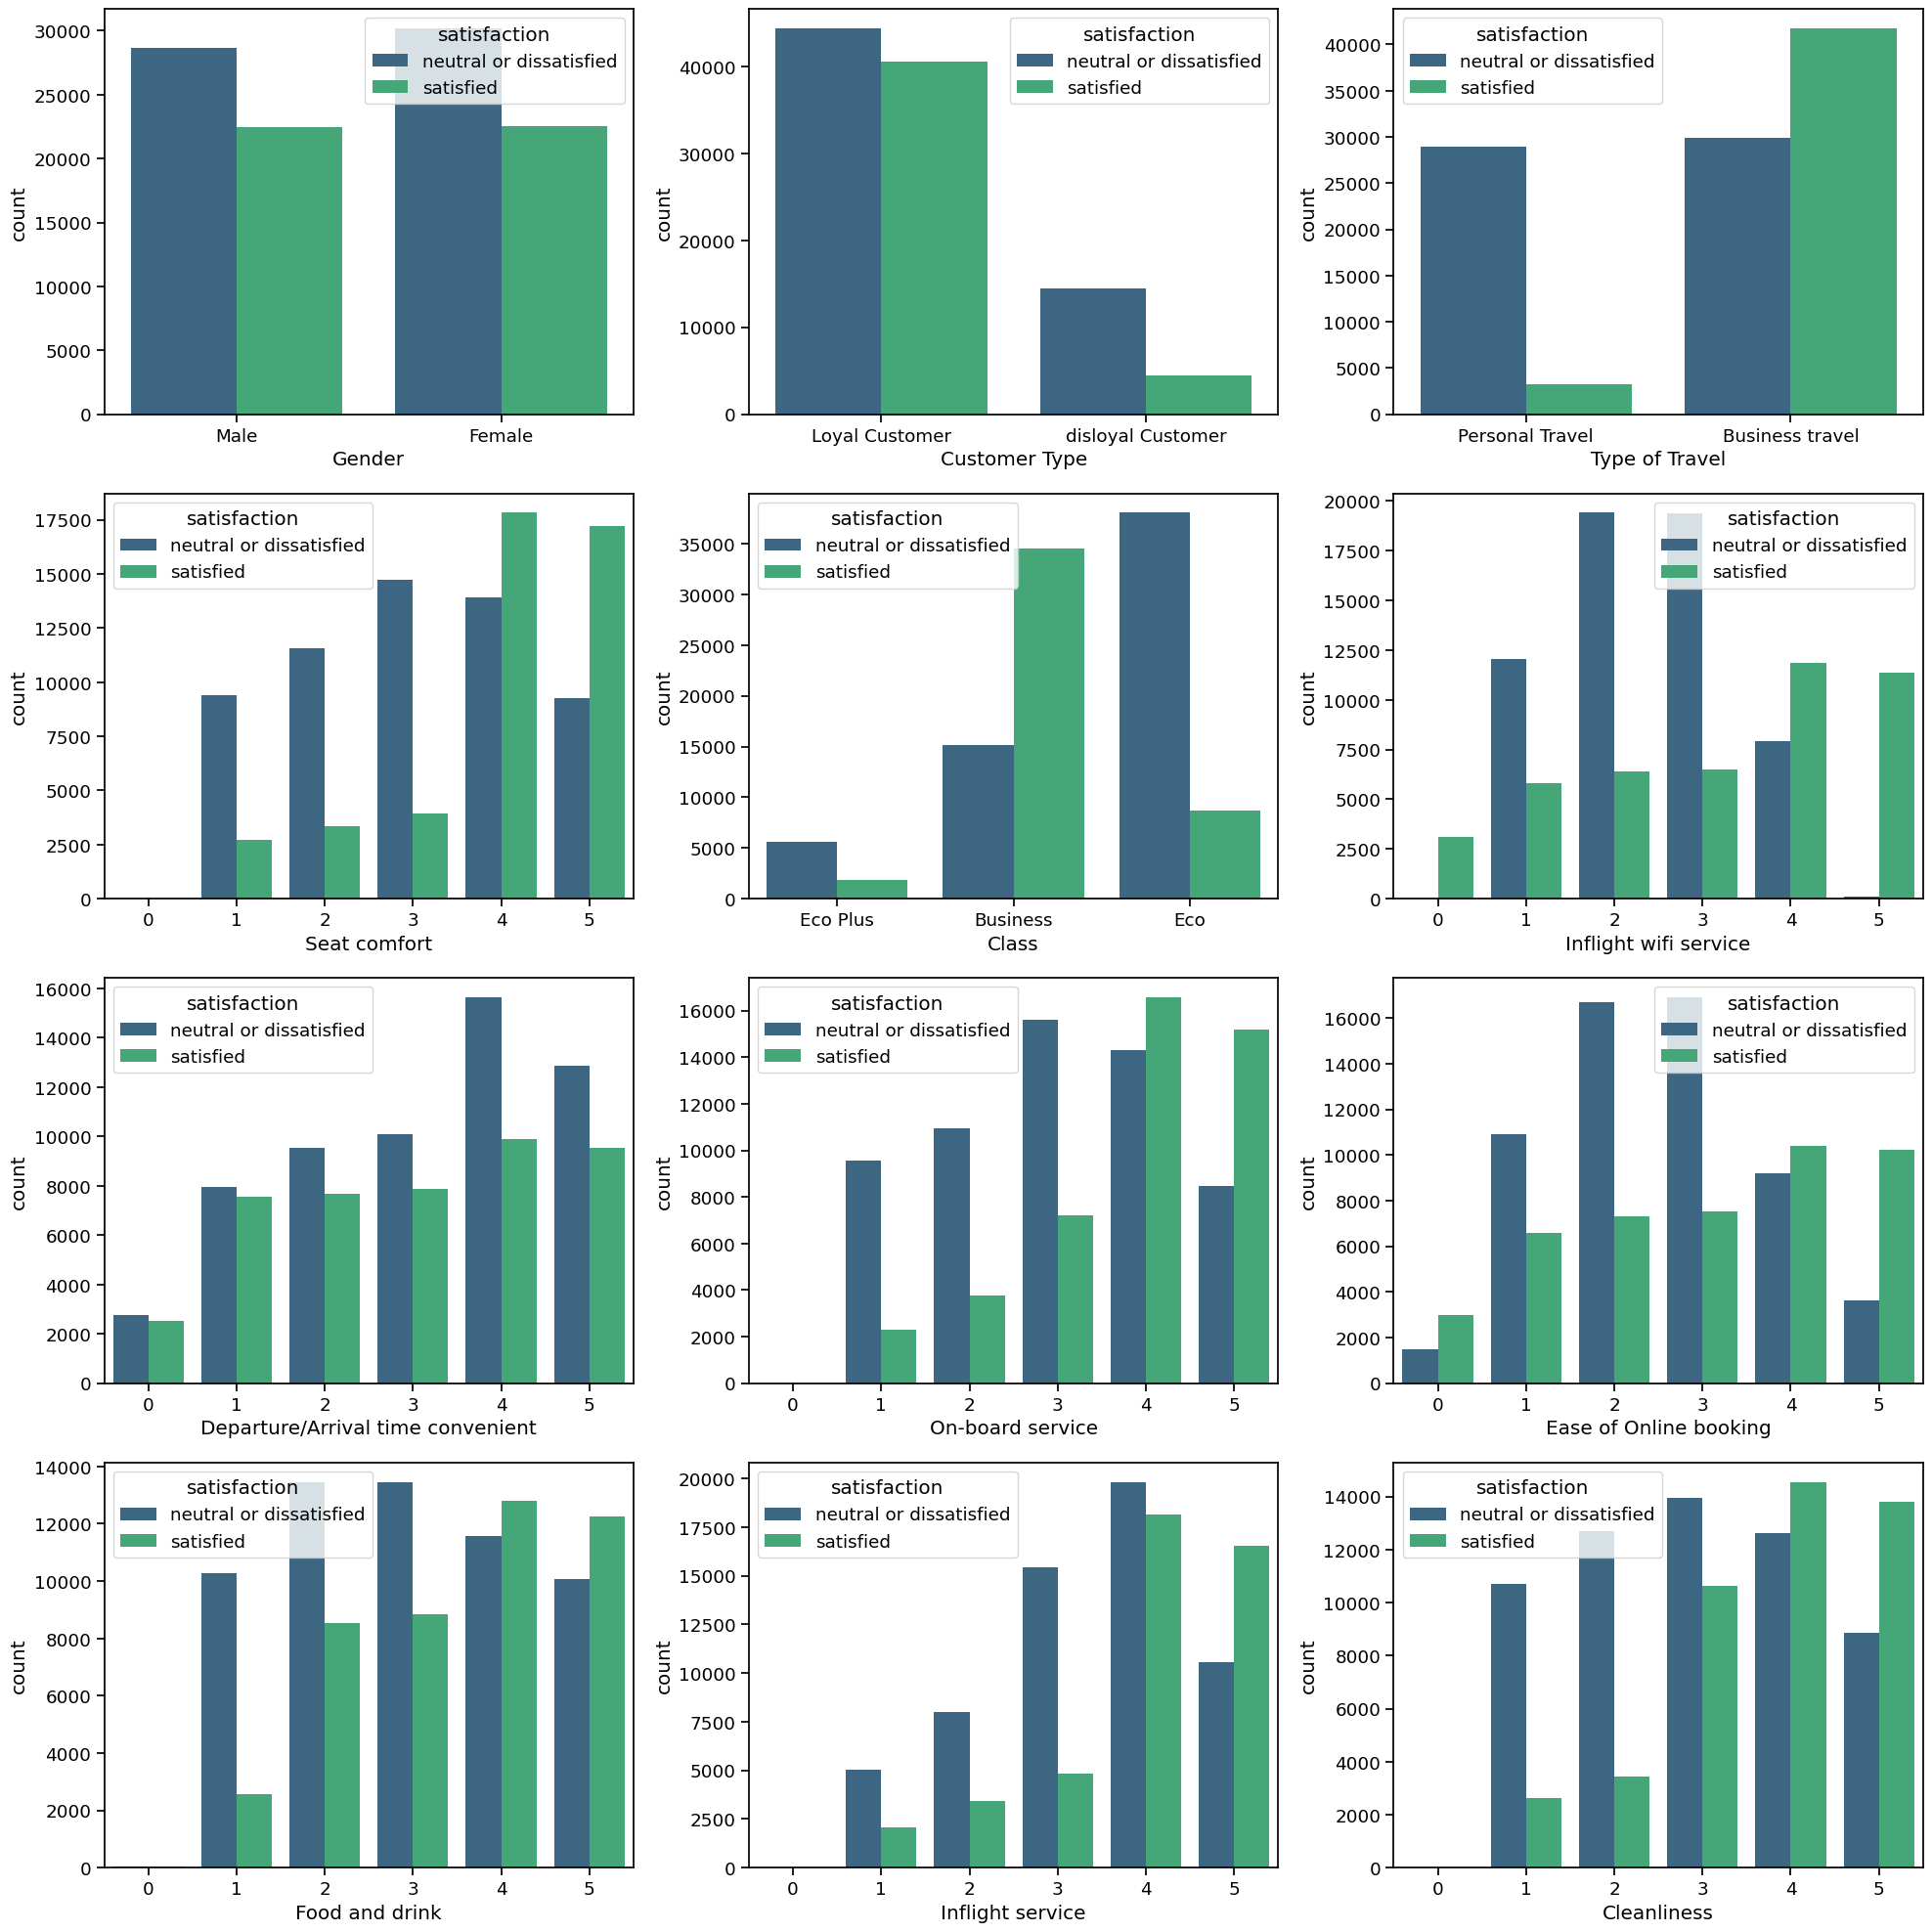

In [64]:
n_rows = 4
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols_temp):
            ax_i = ax[r, c]
            sns.countplot(x=cols_temp[i], data=data, hue='satisfaction', palette='viridis', ax=ax_i);

plt.tight_layout()
plt.show()

* People travelling for business are more satisfied as compared to people who are travelling for other purposes.
* Business class people are more satisfied as compared to people travelling in eco class
* Majority of people who gave 4 or 5 rating in any of the category were generally satisfied with the airline.

#### **Data cleaning**

##### Filing missing data

In [65]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [66]:
median_val = data['Arrival Delay in Minutes'].median()
# Filling missing values with median as distribution of arrival delay was heavily skewed
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(median_val)

In [67]:
data[cat_columns].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

Some of the missing values in categorical columns are represented by 0, lets replace them with mode of that particular column

In [68]:
columns_containing_0 = [
    'Inflight wifi service', 
    'Departure/Arrival time convenient', 
    'Ease of Online booking', 
    'Gate location', 'Food and drink', 
    'Online boarding', 
    'Seat comfort', 
    'Inflight entertainment', 
    'On-board service', 
    'Leg room service', 
    'Checkin service', 
    'Inflight service', 
    'Cleanliness'
]

modes = data[columns_containing_0].mode()
data[columns_containing_0] = data[columns_containing_0].replace({'0': modes})

##### Feature Transformation

Lot of features were skewed, therefore it will be appropriate to apply log transformation to them

In [69]:
data['Flight Distance'] = np.log1p(data['Flight Distance'])

##### Encoding

In [70]:
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
data['Class'] = data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

In [71]:
s = StandardScaler()
x = data.drop("satisfaction", axis=1)
y = data["satisfaction"]
x = s.fit_transform(x)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **K Nearest Neighbors**

In [75]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, x_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.924


In [76]:
y_pred = knn.predict(x_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.926


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11713
           1       0.94      0.88      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



#### **Choosing a K value**

In [78]:
accuracy = []
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

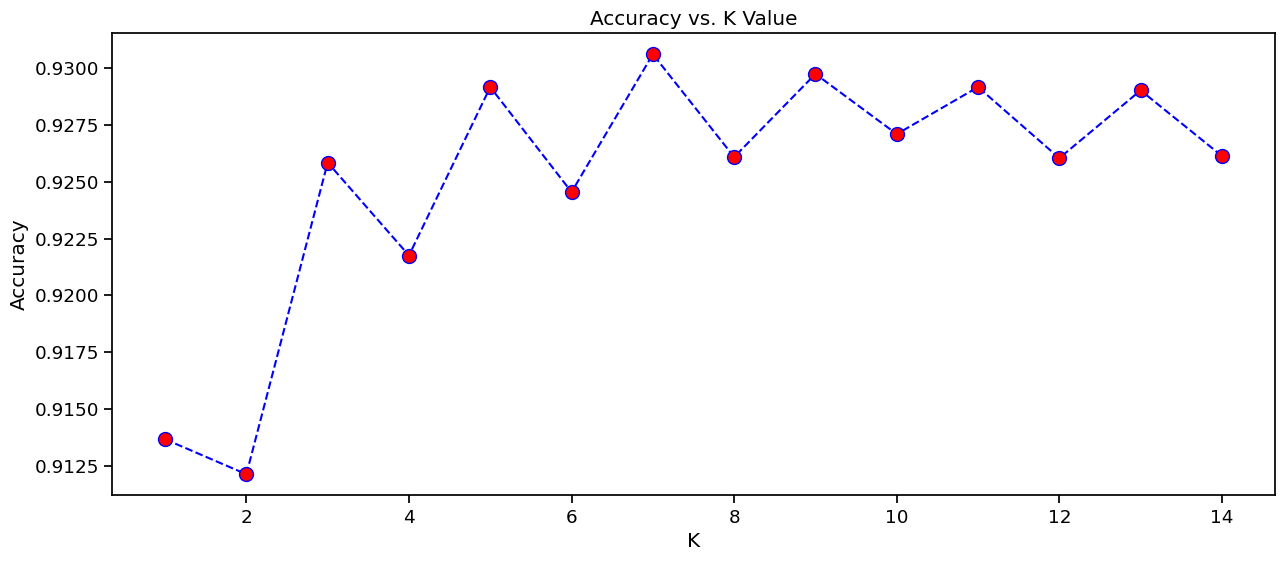

In [79]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

Maximum accuracy occurs when k = 5, lets re train our model for k = 5

In [81]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#### **Evaluation**

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 92.92%


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11713
           1       0.95      0.88      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781



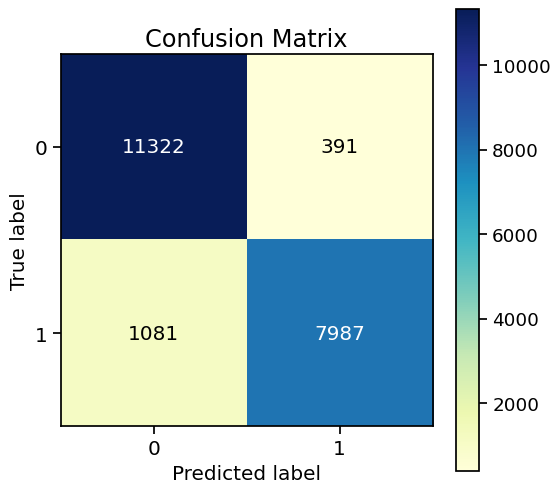

In [84]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'YlGnBu');